# HDBScan

In [87]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as data
import pandas as pd
%matplotlib inline
sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}

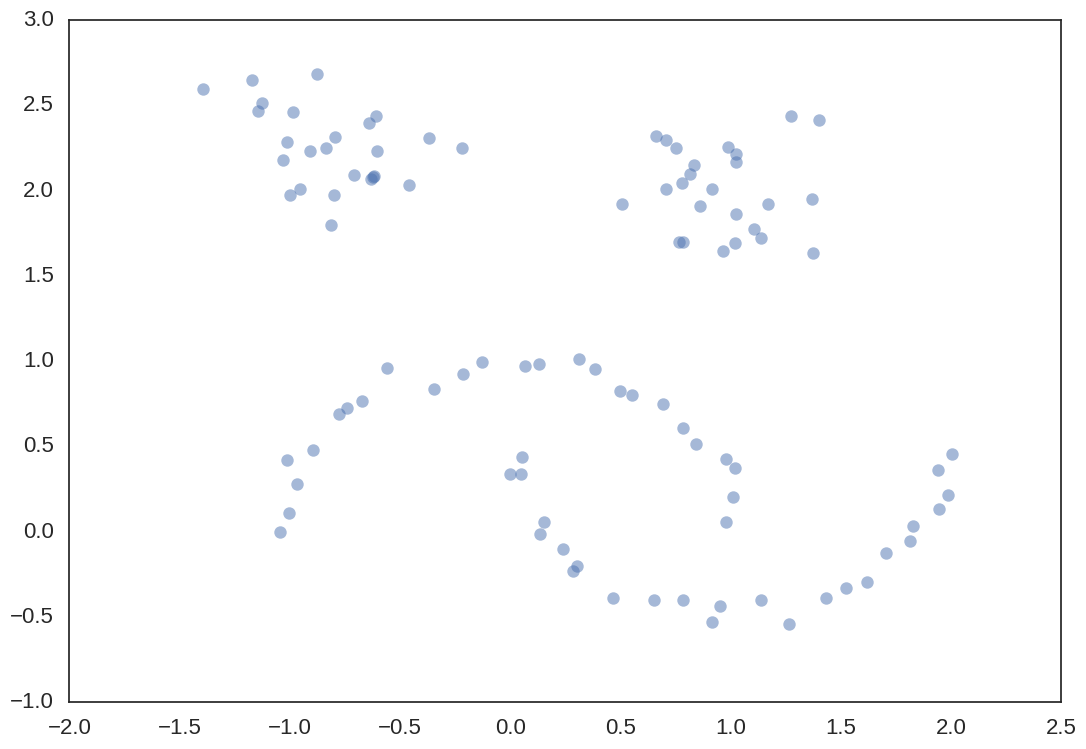

In [88]:
moons, _ = data.make_moons(n_samples=50, noise=0.05)
blobs, _ = data.make_blobs(n_samples=50, centers=[(-0.75,2.25), (1.0, 2.0)], cluster_std=0.25)
test_data = np.vstack([moons, blobs])
plt.scatter(test_data.T[0], test_data.T[1], color='b', **plot_kwds)

In [89]:
%time
import hdbscan

clusterer = hdbscan.HDBSCAN(algorithm='best', 
                            alpha=1.0, 
                            approx_min_span_tree=True,
                            core_dist_n_jobs = 4,
                            gen_min_span_tree=True, 
                            leaf_size=40,
                            metric='euclidean', 
                            min_cluster_size=5, 
                            min_samples=None, 
                            p=None)
clusterer.fit(test_data)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 9.06 µs


HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
    approx_min_span_tree=True, core_dist_n_jobs=4, gen_min_span_tree=True,
    leaf_size=40, memory=Memory(cachedir=None), metric='euclidean',
    min_cluster_size=5, min_samples=None, p=None)

In [90]:
print clusterer.probabilities_[0:5]
print clusterer.labels_[0:5]
print clusterer.outlier_scores_[0:5]


[ 1.  1.  1.  1.  1.]
[1 1 1 1 1]
[ 0.          0.          0.          0.19214433  0.07532065]


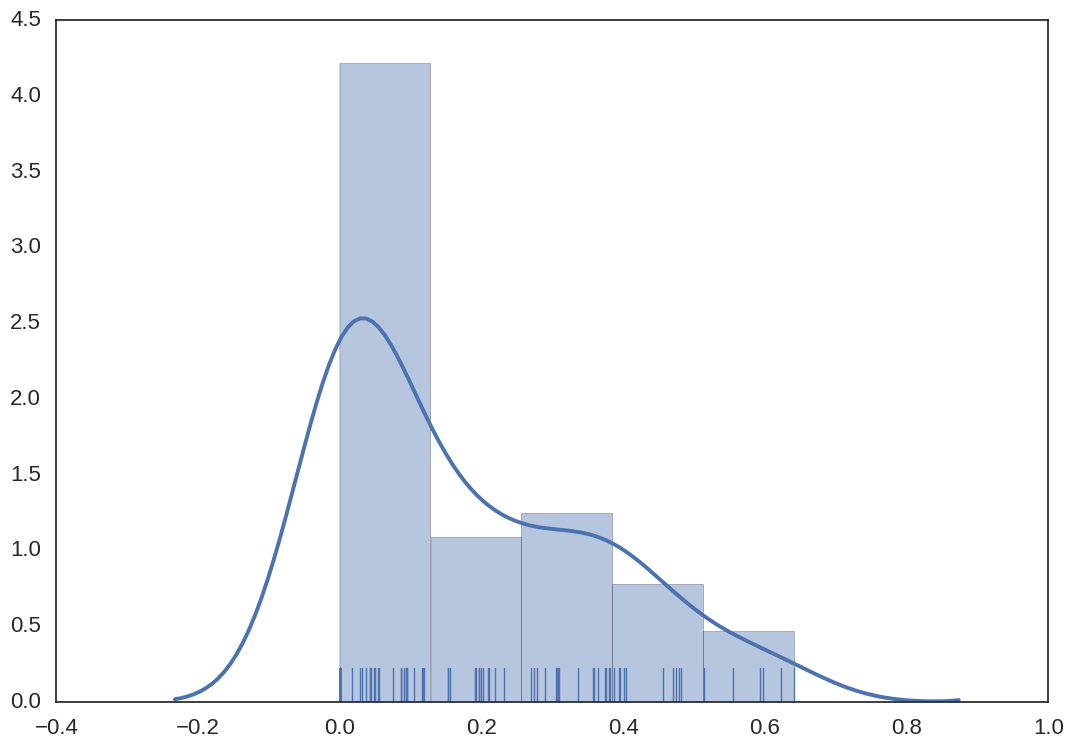

In [91]:
sns.distplot(clusterer.outlier_scores_[np.isfinite(clusterer.outlier_scores_)], rug=True)

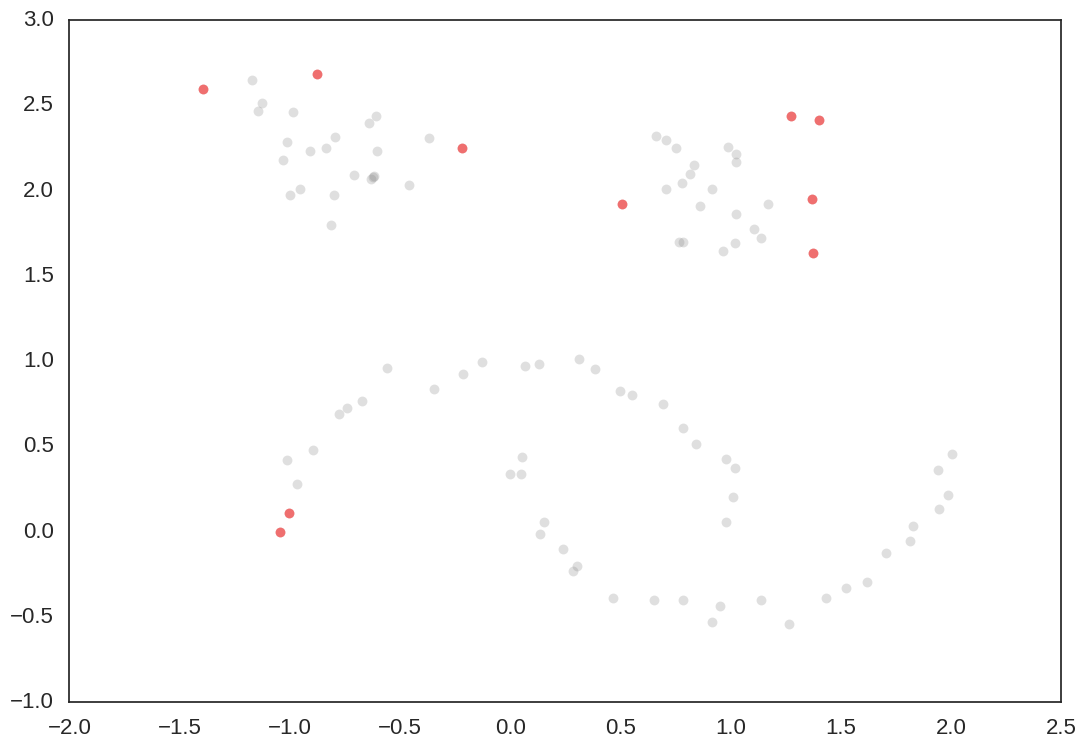

In [92]:
threshold = pd.Series(clusterer.outlier_scores_).quantile(0.9)
outliers = np.where(clusterer.outlier_scores_ > threshold)[0]
plt.scatter(*test_data.T, s=50, linewidth=0, c='gray', alpha=0.25)
plt.scatter(*test_data[outliers].T, s=50, linewidth=0, c='red', alpha=0.5)

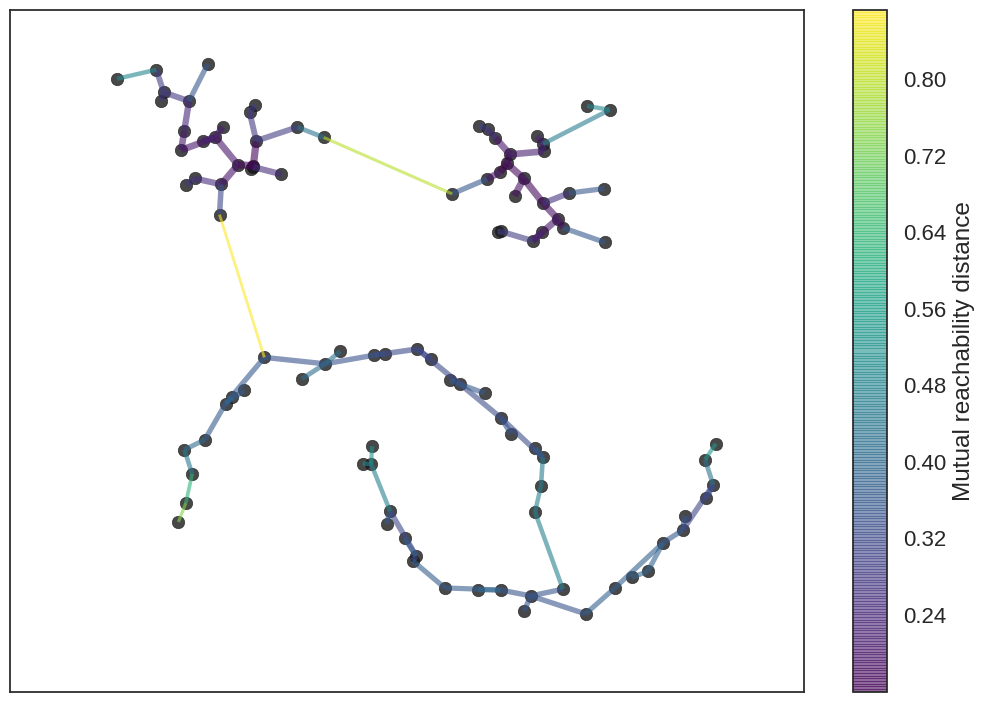

In [93]:
clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis',
                                      edge_alpha=0.6,
                                      node_size=80,
                                      edge_linewidth=2)

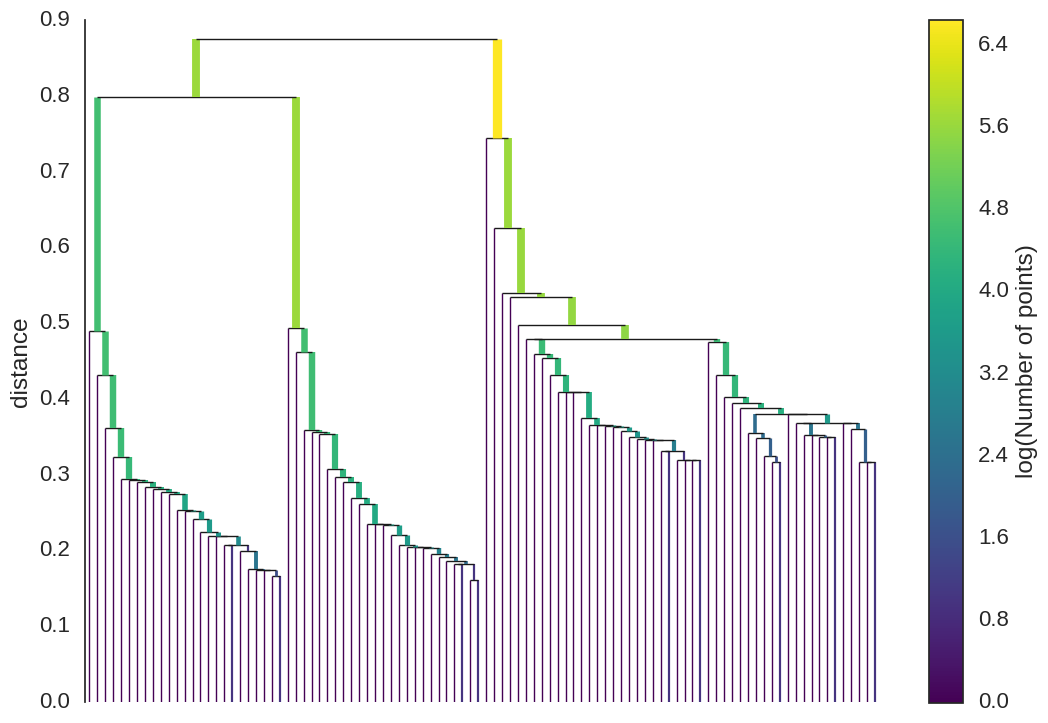

In [94]:
clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)

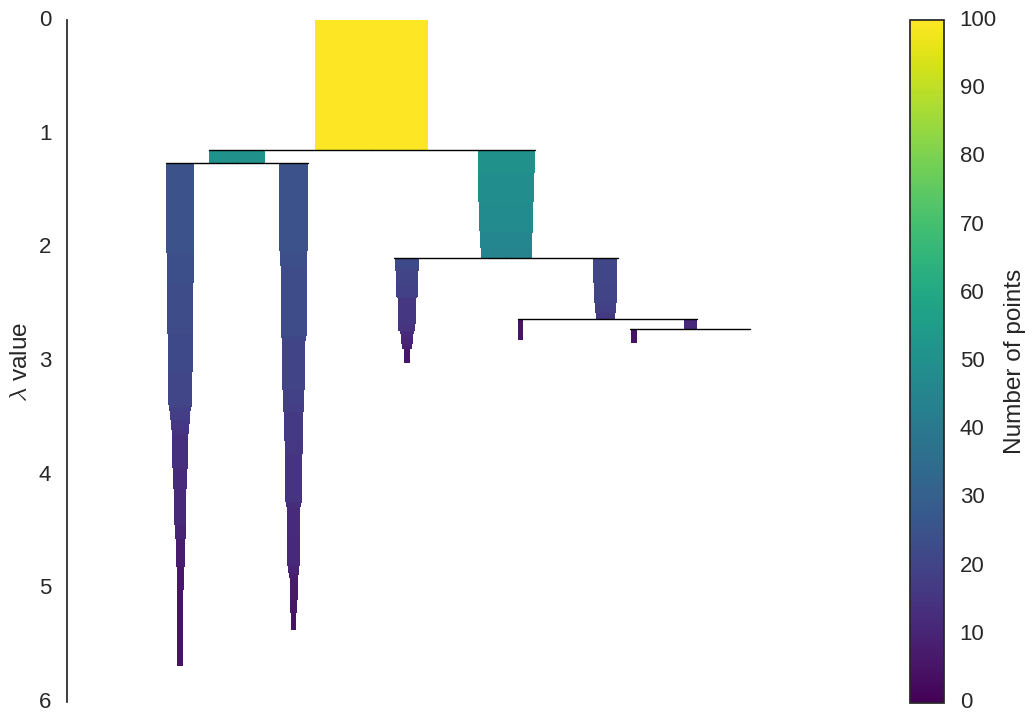

In [95]:
clusterer.condensed_tree_.plot()

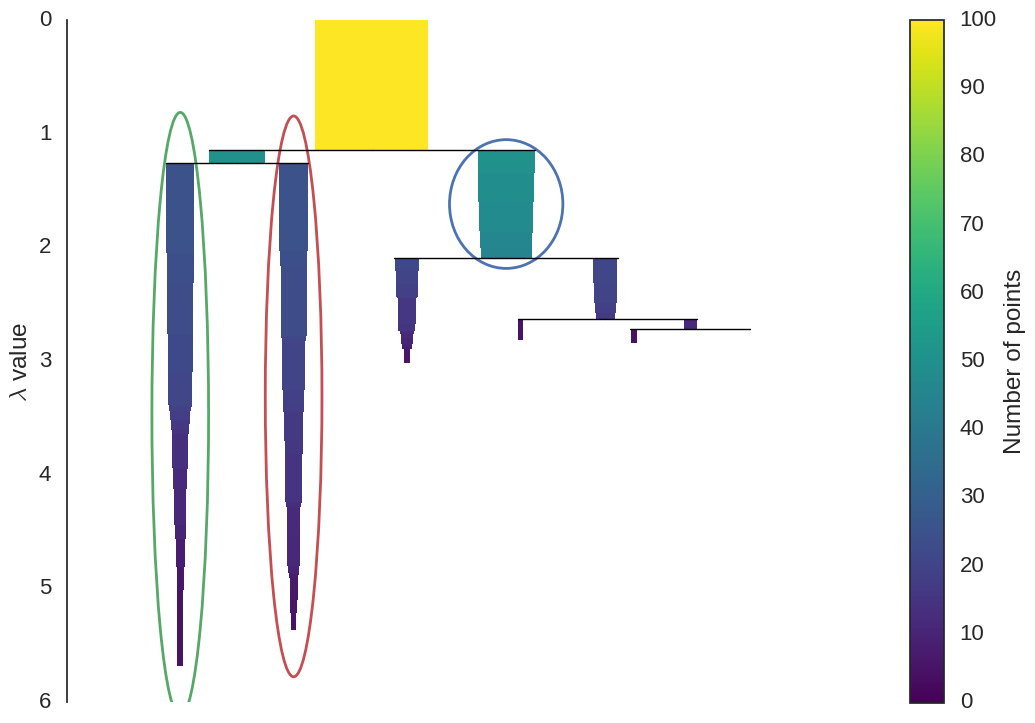

In [96]:
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())

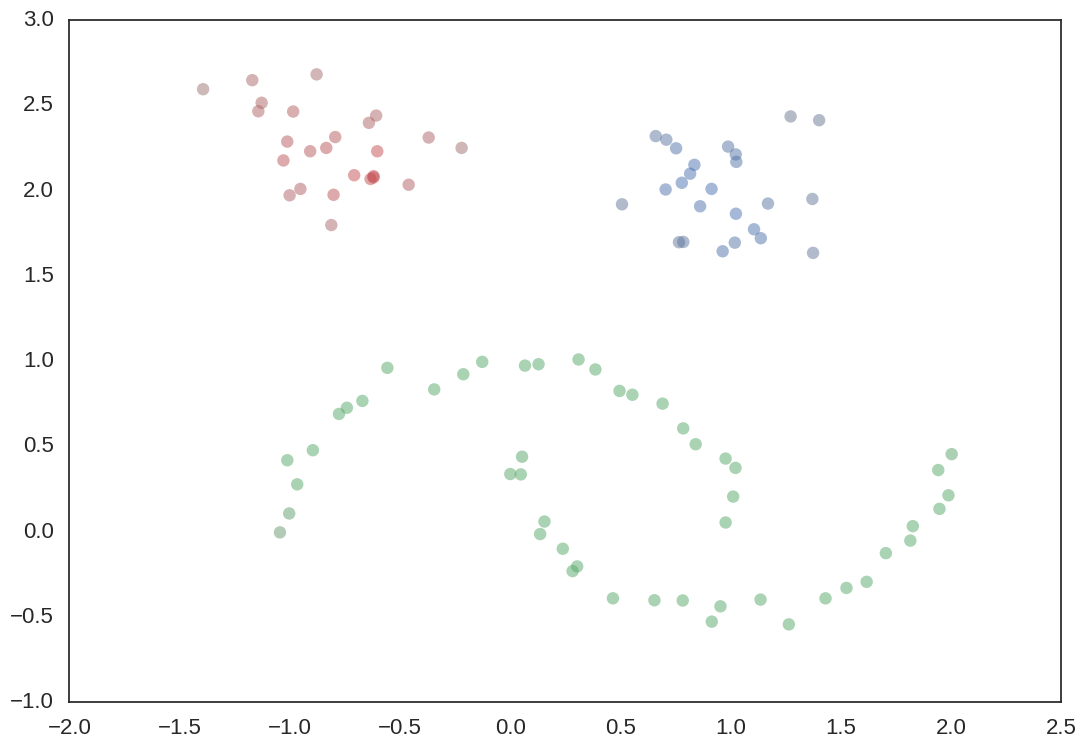

In [97]:
palette = sns.color_palette()
cluster_colors = [sns.desaturate(palette[col], sat)
                  if col >= 0 else (0.5, 0.5, 0.5) for col, sat in
                  zip(clusterer.labels_, clusterer.probabilities_)]
plt.scatter(test_data.T[0], test_data.T[1], c=cluster_colors, **plot_kwds)

# Selecting Minimum Cluster Size

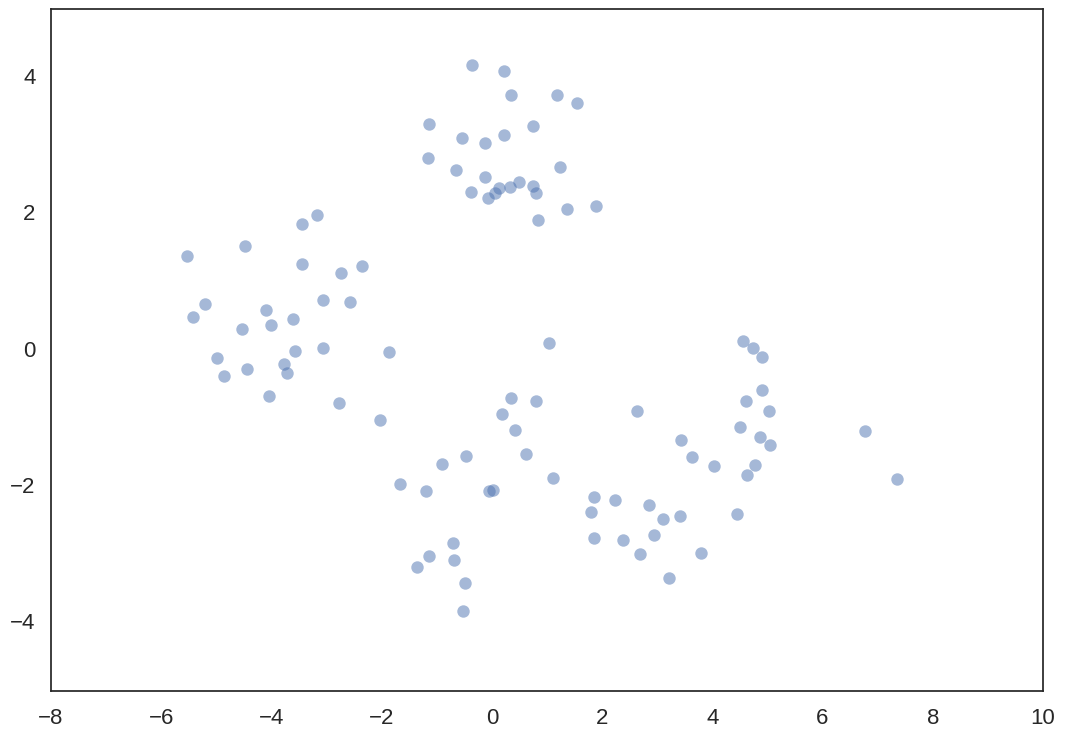

In [98]:
from sklearn.manifold import TSNE
projection = TSNE(perplexity=50,learning_rate=200).fit_transform(test_data) 
plt.scatter(*projection.T, **plot_kwds)

In [106]:


def plot_hdbscan_tsne(test_size):
    clusterer = hdbscan.HDBSCAN(algorithm='best', 
                            alpha=1.0, 
                            approx_min_span_tree=True,
                            core_dist_n_jobs = 4,
                            gen_min_span_tree=True, 
                            leaf_size=40,
                            metric='euclidean', 
                            min_cluster_size=test_size, 
                            min_samples=None, 
                            p=None).fit(test_data)
    palette = sns.color_palette()
    cluster_colors = [sns.desaturate(palette[col], sat)
                      if col >= 0 else (0.5, 0.5, 0.5) for col, sat in
                      zip(clusterer.labels_, clusterer.probabilities_)]
    
    
    plt.scatter(test_data.T[0], test_data.T[1], c=cluster_colors, **plot_kwds)

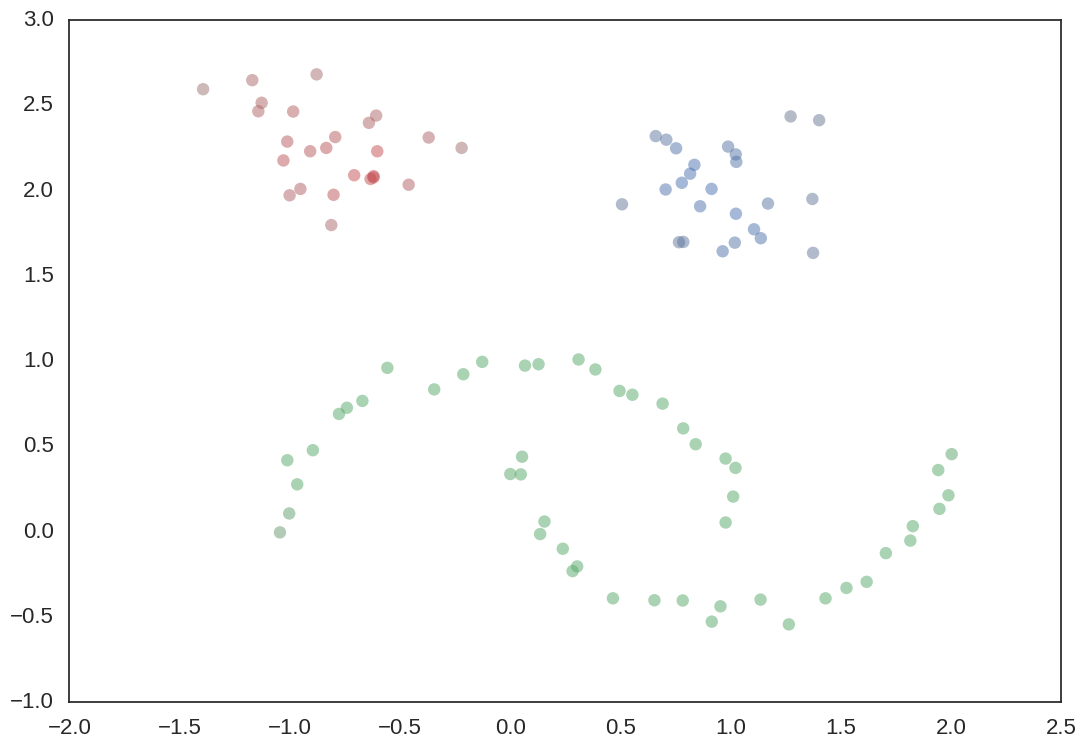

In [107]:
plot_hdbscan_tsne(5)

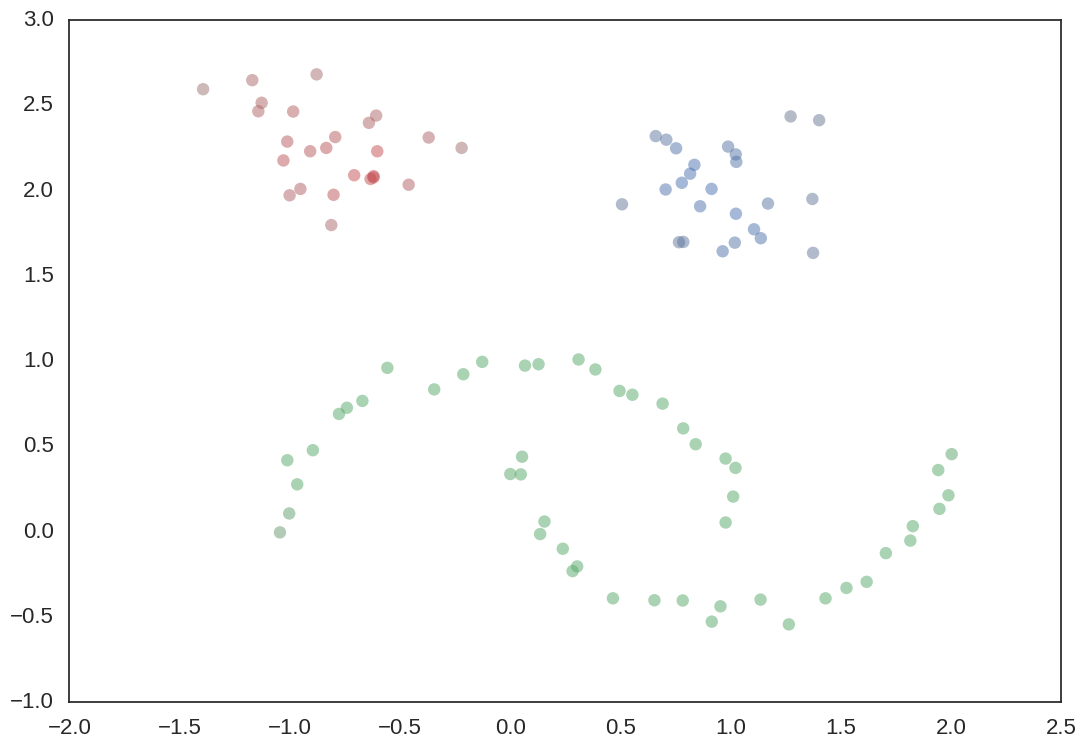

In [105]:
plot_hdbscan_tsne(5)